In [1]:
import os

# List all files and folders in the current directory
print("📁 Current Directory Contents:")
for item in os.listdir():
    print("—", item)

📁 Current Directory Contents:
— .ipynb_checkpoints
— Kalman_filter_sim.ipynb
— release


In [3]:
release_path = "release"
print(f"📁 Contents of folder: {release_path}")
for item in os.listdir(release_path):
    print("—", item)

📁 Contents of folder: release
— taxi_log_2008_by_id
— Thumbs.db
— user_guide.pdf


In [5]:
data_folder = "release/taxi_log_2008_by_id"
print(f"📁 Contents of: {data_folder}")
for item in os.listdir(data_folder):
    print("—", item)

📁 Contents of: release/taxi_log_2008_by_id
— 1.txt
— 10.txt
— 100.txt
— 1000.txt
— 10000.txt
— 10001.txt
— 10002.txt
— 10003.txt
— 10004.txt
— 10005.txt
— 10006.txt
— 10007.txt
— 10008.txt
— 10009.txt
— 1001.txt
— 10010.txt
— 10011.txt
— 10012.txt
— 10013.txt
— 10014.txt
— 10015.txt
— 10016.txt
— 10017.txt
— 10018.txt
— 10019.txt
— 1002.txt
— 10020.txt
— 10021.txt
— 10022.txt
— 10023.txt
— 10024.txt
— 10025.txt
— 10026.txt
— 10027.txt
— 10028.txt
— 10029.txt
— 1003.txt
— 10030.txt
— 10031.txt
— 10032.txt
— 10033.txt
— 10034.txt
— 10035.txt
— 10036.txt
— 10037.txt
— 10038.txt
— 10039.txt
— 1004.txt
— 10040.txt
— 10041.txt
— 10042.txt
— 10043.txt
— 10044.txt
— 10045.txt
— 10046.txt
— 10047.txt
— 10048.txt
— 10049.txt
— 1005.txt
— 10050.txt
— 10051.txt
— 10052.txt
— 10053.txt
— 10054.txt
— 10055.txt
— 10056.txt
— 10057.txt
— 10058.txt
— 10059.txt
— 1006.txt
— 10060.txt
— 10061.txt
— 10062.txt
— 10063.txt
— 10064.txt
— 10065.txt
— 10066.txt
— 10067.txt
— 10068.txt
— 10069.txt
— 1007.txt
— 

In [7]:
import pandas as pd

# Define the path to the file
file_path = "release/taxi_log_2008_by_id/1.txt"

# Read the file into a DataFrame
df = pd.read_csv(file_path, header=None, names=["Taxi_ID", "Timestamp", "Longitude", "Latitude"])

# Display the first few rows
df.head()

,Taxi_ID,Timestamp,Longitude,Latitude
0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,2008-02-02 15:46:08,116.51135,39.93883
2,1,2008-02-02 15:46:08,116.51135,39.93883
3,1,2008-02-02 15:56:08,116.51627,39.91034
4,1,2008-02-02 16:06:08,116.47186,39.91248


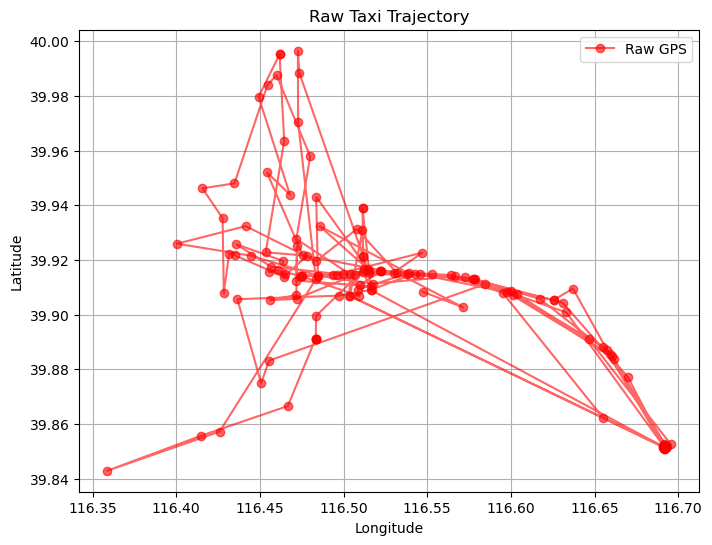

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(df["Longitude"], df["Latitude"], 'o-', label="Raw GPS", color='red', alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Raw Taxi Trajectory")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np

# Prepare measurement data
measurements = np.vstack((df["Longitude"].values, df["Latitude"].values)).T

# Initialize Kalman Filter parameters
n = len(measurements)
predicted = []
x = np.array([[measurements[0, 0]], [measurements[0, 1]]])  # initial state (position)
P = np.eye(2) * 1000  # initial uncertainty
F = np.eye(2)         # state transition matrix
H = np.eye(2)         # measurement function
R = np.eye(2) * 0.0001  # measurement noise
Q = np.eye(2) * 0.00001  # process noise

# Kalman Filter loop
for z in measurements:
    # Prediction
    x = F @ x
    P = F @ P @ F.T + Q

    # Update
    Z = np.array([[z[0]], [z[1]]])
    y = Z - H @ x
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    x = x + K @ y
    P = (np.eye(2) - K @ H) @ P

    predicted.append(x.flatten())

predicted = np.array(predicted)


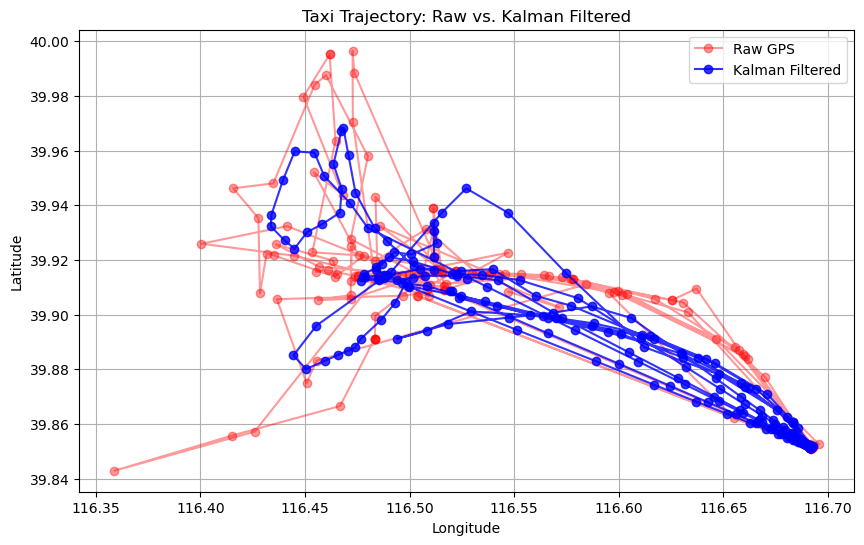

In [15]:
plt.figure(figsize=(10, 6))

# Raw trajectory
plt.plot(df["Longitude"], df["Latitude"], 'ro-', label='Raw GPS', alpha=0.4)

# Kalman filtered trajectory
plt.plot(predicted[:, 0], predicted[:, 1], 'bo-', label='Kalman Filtered', alpha=0.8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Taxi Trajectory: Raw vs. Kalman Filtered")
plt.legend()
plt.grid(True)
plt.show()
